# Kmeans

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Generate data

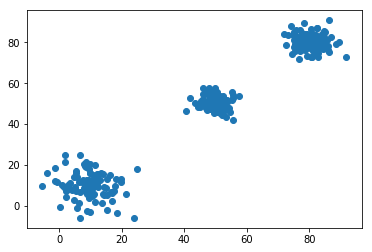

In [13]:
points = np.vstack((np.random.normal(80, 4, size=(100, 2)),
                   np.random.normal(50, 3, size=(100, 2)),
                   np.random.normal(10, 6, size=(100, 2))))

plt.scatter(points[:, 0], points[:, 1])

## 2. Initialize centroids

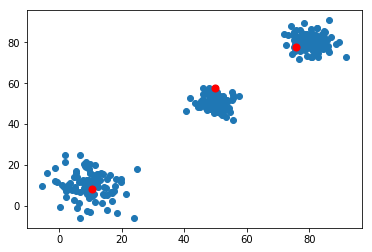

In [15]:
def init_centroids(points, k):
    """
    Returns K number of centroids from points.
    """
    centroids = np.random.shuffle(points)

    return points[:k]
    
centroids = init_centroids(points, 3)
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)


## 3. Compute distances

In [24]:
def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)

closest = closest_centroid(points, centroids)
closest

array([0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1,
       1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0,
       1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2,
       1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1,
       2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1,
       2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2,
       0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0,
       2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1,
       0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2,
       2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0,
       1, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1,
       0], d

## 4. Recalculate centroids

In [32]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest == k].mean(axis=0) for k in range(centroids.shape[0])])

new_centroids = move_centroids(points, closest, centroids)
new_centroids

array([[ 80.37807754,  80.26942704],
       [  9.56026076,  10.10041685],
       [ 49.87182485,  50.24622641]])

Text(0.5,1,'Initial centroids')

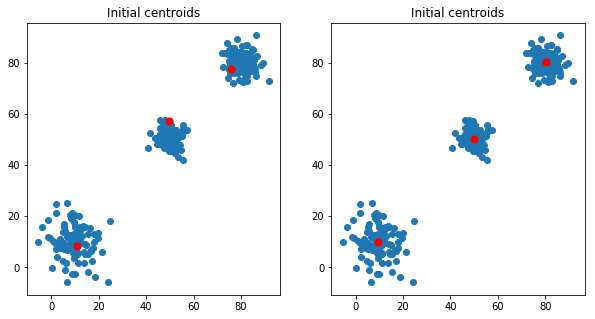

In [34]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
plt.title("Initial centroids")

plt.subplot(1, 2, 2)
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=50)
plt.title("Initial centroids")


## 5. Visualize Clustered data.

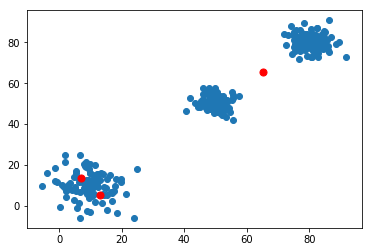

In [39]:
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

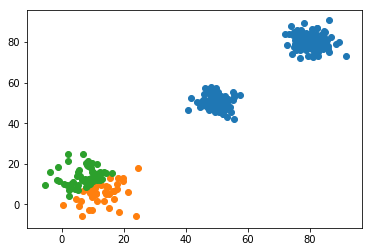

In [38]:
# This is an iterative process.
centroids = init_centroids(points, 3)
for i in range(100):
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    
for k in range(centroids.shape[0]):
    cluster_points = points[closest == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1])